# Assignment 01: Supervised learning, linear models, and loss functions [100 points]

In this assignment, you're going to hard code OLS and LAD cost functions to fit regression lines to a data set. For hint, refer to the lecture slides and follow the same structure for your coding, functions etc.

## Data set
`Assignment_1_data.csv` represents the marks, number of courses taken, and study time of 100 students.

## Caveat
Once you are done, please do the following steps:

1.  Restart your kernel by clicking 'Kernel' > 'Restart & Run All'.

2.  Fix any errors which result from this.

3.  Repeat steps 1 and 2 until your notebook runs errors free.

4.  Submit your completed notebook to OWL by the deadline.

5. Do not clear the answer outputs of your cells. When we open your notebooks for grading the outputs must be there, else marks will be deducted.

## Toolbox

In [40]:
# Import all the necessary packages:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as ss
import scipy.optimize as so
from IPython.display import display
%matplotlib inline

---
## Part 1
### Question 1.1 [14 points]


Read the `Assignment_1_data.csv` file as a `pandas.DataFrame`. Use appropriate pandas commands to show the descriptive statistics of the dataset as well as its first 10 rows.

In [41]:
# 6 points
# YOUR CODE HERE:

student_data = pd.read_csv('Assignment_1_data.csv')

display(student_data.head(10))

display(student_data.describe())

,number_courses,Marks,time_study
0,3,19.202,13.524
1,4,7.734,0.384
2,4,13.811,12.532
3,6,53.018,47.454
4,8,55.299,62.488
5,6,17.822,19.266
6,3,29.889,18.189
7,5,17.264,17.065
8,4,20.348,17.640
9,3,30.862,18.519


,number_courses,Marks,time_study
count,100.000000,100.000000,100.000000
mean,5.290000,24.417690,22.434030
std,1.799523,14.326199,16.692231
min,3.000000,5.609000,0.384000
25%,4.000000,12.633000,9.567750
50%,5.000000,20.059500,18.763000
75%,7.000000,36.676250,31.468000
max,8.000000,55.299000,62.488000


Add a new column to the dataframe and name it as "time_study_avg". Divide each student's "time_study" by his/her "number_courses" to calculate this new attribute. Then, drop the original "time_study" column as we do not need it anymore.

In [42]:
# 2 pts
# YOUR CODE HERE:

student_data['time_study_avg'] = student_data['time_study']/student_data['number_courses']

student_data.drop('time_study', axis=1, inplace=True)

student_data.head(5)

,number_courses,Marks,time_study_avg
0,3,19.202,4.508
1,4,7.734,0.096
2,4,13.811,3.133
3,6,53.018,7.909
4,8,55.299,7.811


Compute the Pearson’s Correlation Coefficient between study time per course and marks. Then Investigate the relationship between the students' study time and marks by plotting a scatter plot of the `time_study_avg` (x axis) and `Marks` columns (y axis). Add an `alpha` (transparency of the plotted dots) in case some data are overlapping. Remember to label the axes.

Pearson’s Correlation Coefficient: 0.9422538903640542


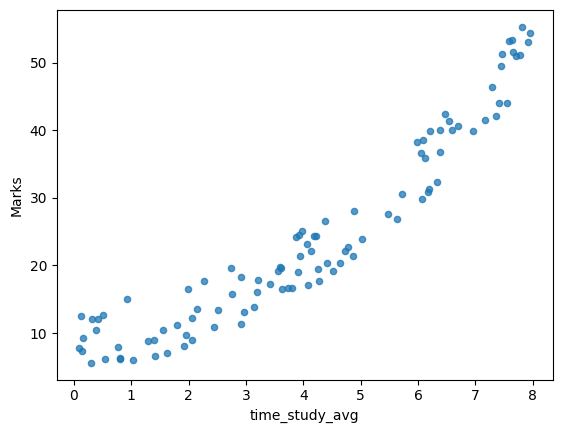

In [43]:
# 4 points
# YOUR CODE HERE:

correlation = student_data['Marks'].corr(student_data['time_study_avg'])
print('Pearson’s Correlation Coefficient:', correlation)

student_data.plot.scatter(x='time_study_avg', y='Marks', alpha=0.75)
plt.show()

**Written question:** What do you see here? Discuss your findings. [2 points]

<font color='yellow'>**Written answer:**

There is a strong correlation between them. As the time of study increases the Marks increase too. The scatter plot confirms this finding.</font>

---
### Question 1.2 [4 point]

Recall that the linear model, we obtain predictions by computing

$ \hat{\mathbf{y}} = \mathbf{X} \hat{\beta} $

Here, $\mathbf{X}$ is a design matrix which includes a column of ones, $\hat{\beta}$ are coefficients, and $\hat{\mathbf{y}}$ are outcomes.  Write a function `linearModelPredict` to compute linear model predictions given data and a coefficient vector.  The function should take as it's arguments a 1d-array of coefficients `b` and the design matrix `X` as a 2d-array and return linear model predictions `yp`.

Test the function by setting

```
X = np.array([[1,0],[1,-1],[1,2]])
b = np.array([0.1,0.3])
```

Call your function using these values.

Report $\hat{\mathbf{y}}$.

What is the dimensionality of the numpy-array that you get back?

Hint:  Read the documentation for `np.dot` or the `@` operator in `numpy`.

In [44]:
# 4pt
# YOUR CODE HERE:

def linearModelPredict(b,X):
    # Numpy does matrix multiplication in a few ways.
    # The dot or @ operator are most common.
    # b should always have the same dimensionality as X has columns.
    yp = np.dot(X,b)
    # or
    #yp = X@b

    return yp

# Test
X = np.array([[1,0],[1,-1],[1,2]])
b = np.array([0.1,0.3])
print("X@b is %s" % str(linearModelPredict(b,X)))

X@b is [ 0.1 -0.2  0.7]


In [45]:
# Note that b can either be a 2d array or a 1d array and the multiplication will still work
# This requires you to be cognizant about shapes and keep track of the dimension.
# Here are some examples

# b is a 2d array
print('Using a 2d array...')
X = np.eye(2)
b = 2*np.ones(2).reshape(-1,1)

print("X looks like:\n", X)
print("b looks like:\n", b)
#Note, the result of this multiplication is a 2d array
print("X@b is \n ", linearModelPredict(b,X))


# b is a 1d array
print('\n\nUsing a 1d array...')
X = np.eye(2)
b = 2*np.ones(2)

print("X looks like:\n", X)
print("b looks like:\n", b)
#Note, the result of this multiplication is a 1d array
print("X@b is \n ", linearModelPredict(b,X))

Using a 2d array...
X looks like:
 [[1. 0.]
 [0. 1.]]
b looks like:
 [[2.]
 [2.]]
X@b is 
  [[2.]
 [2.]]


Using a 1d array...
X looks like:
 [[1. 0.]
 [0. 1.]]
b looks like:
 [2. 2.]
X@b is 
  [2. 2.]


---
### Question 1.3 [10 points]

Write a function `linearModelLossRSS` which computes and returns the loss function for an OLS model parameterized by $\beta$, as well as the gradient of the loss.  The function should take as its first argument a 1d-array `beta` of coefficients for the linear model, as its second argument the design matrix `X` as a 2d-array, and as its third argument a 1d-array `y` of observed outcomes.

Test the function with these values:

```
X = np.array([[1,0],[1,-1],[1,2]])
b = np.array([0.1,0.3])
y = np.array([0,0.4,2])
```

It must return:

Loss (RSS) of $2.06$

Gradient of $[-3.6 -4. ]$


In [57]:
# 8 pts
# YOUR CODE HERE:

def linearModelLossRSS(b,X,y):
    # The loss is really a function of b.  The b changes, the X and y stay fixed.
    # Make predictions
    predY = linearModelPredict(b,X)

    # Compute residuals.  This is an array.  The dimension of res will depend on if
    # b is 1d or 2d.  If b is 2d, predY will be 2d, and so res will be 2d due to something
    # called "array broadcasting".

    res = y-predY
    # Simply sum up the squared residuals.  This is the value of our loss.

    residual_sum_of_squares = sum(res**2)
    # Because res is a vector, we can take the product of res with X.
    # Since X is two dimensional because it is a design matrix, this results in a
    # 2d array.  The gradient has two elements because there are two parameters.
    gradient=-2*np.dot(res,X)
    # or 
    # gradient=-2*(res @ X)
    # or
    # gradient=-2*(X.T@res)

    return (residual_sum_of_squares, gradient)


X = np.array([[1,0],[1,-1],[1,2]])
b = np.array([0.1,0.3])
y = np.array([0,0.4,2])
loss, grad =linearModelLossRSS(b,X,y)
print("Loss:", loss)
print("\nGradient:", grad)

Loss: 2.06

Gradient: [-3.6 -4. ]


**Written question:** To minimize the loss, do you need increase or decrease the value of the parameters? [2 points]


<font color='yellow'>**Written answer:**

The gradient is negative for both parameters, therefore both need to be increased to minimize the cost. </font>

---
### Question 1.4 [12 points]

Now that you've implemented a loss function in question 1.3, it is now time to minimize it.

Write a function `linearModelFit` to fit a linear model.  The function should take as its first argument the design matrix `X` as a 2d-array, as its second argument a 1d-array `y` of outcomes, and as its third argument a function  `lossfcn` which returns as a tuple the value of the loss, as well as the gradient of the loss. As a result, it should return the estimated betas and the R2.

Test the function with these values:
```
X = np.array([[1,0],[1,-1],[1,2]])
y = np.array([0,0.4,2])
```
It must return:

Betas: `[0.6 0.6]`

R2: `0.75`


**Hint**: Use `scipy.optimize.minimize` (refer to the slides) to minimize the loss function

In [58]:
# 12 pts
# YOUR CODE HERE:

def linearModelFit(X, y, lossfcn):
    # Because we know b has to have the some dimension as X has columns,
    # We can use the number of columns to determine the size of betas
    # In this case, we use a 2d array
    _, ncols = X.shape
    betas=np.zeros(ncols)
    
    # Minimize the loss for betas
    RES = so.minimize(lossfcn, betas, args=(X,y), jac=True)#, options={'disp': True})
    
    # Obtain estimates from the optimizer
    estimated_betas=RES.x

    # Compute goodness of fit
    TSS = sum((y-np.mean(y))**2)
    RSS, _ = linearModelLossRSS(estimated_betas,X,y)
    R2 = 1-RSS/TSS 
    return (estimated_betas, R2)


X = np.array([[1,0],[1,-1],[1,2]])
y = np.array([0,0.4,2])
beta , R2 = linearModelFit(X, y, linearModelLossRSS)

print("\nBetas:", beta)
print("R2:", R2)


Betas: [0.6 0.6]
R2: 0.75


---
### Question 1.5 [14 points]

Use the above functions to fit your model to the given dataset. Then use your model and the fitted parameters to make predictions along a grid of equally spaced students' study time. You can get these by generating a new X-matrix with 100 equally space time_study_avgs (using for example [```np.linspace```](https://numpy.org/doc/stable/reference/generated/numpy.linspace.html)). Plot the data and add a line for the predicted values. Also report the $R^2$ value for the fit. You can do this by either printing out the $R^2$ of the fit or putting it on your plot via the built-in `annotate` function of `matplotlib`.


R2: 0.888


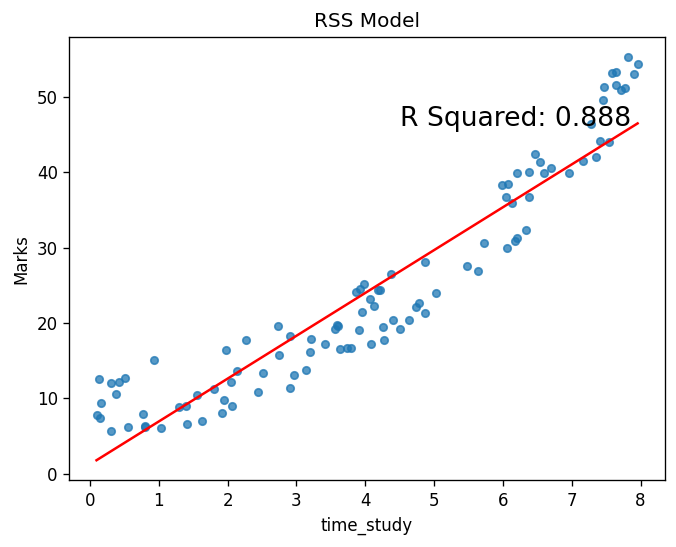

In [59]:
# 14 pts
# YOUR CODE HERE:

# Fit the data
y = student_data.Marks.values
time_study_avg = student_data.time_study_avg.values
N = time_study_avg.size
X = np.c_[np.ones(N), time_study_avg]
betas, R2 = linearModelFit(X,y, lossfcn=linearModelLossRSS)
print("R2:", R2.round(3))

# Create new data
time_study_grid = np.linspace(time_study_avg.min(), time_study_avg.max(), 100)
# Turn it into a design matrix
Xn = np.c_[np.ones(time_study_grid.size), time_study_grid]

# Compute predictions with the new data and estimated coefficients
yn = linearModelPredict(betas, Xn)

fig, ax = plt.subplots(dpi = 120)
student_data.plot.scatter(x='time_study_avg', y='Marks', alpha=0.75, ax=ax)
ax.set_xlabel('time_study')
ax.set_ylabel('Marks')

ax.plot(time_study_grid, yn, color = 'red')
ax.annotate('R Squared: {R2}'.format(R2=R2.round(3)),
            xy=(0.75, 0.8),
            xycoords='axes fraction',
            ha='center',
            fontsize = 16)

ax.set_title('RSS Model')

plt.show()

---
## Part 2: LAD Regression

---
### Question 2.1 [10 points]

In the previous section, we worked with the OLS loss.  Now, we'll implement a linear model with the least absolute deviation (LAD) loss.

Write a function `linearModelLossLAD` which computes the LAD loss function for a linear model parameterized by $\beta$, as well as the gradient of the loss.  The function should take as its first argument a 1d-array `beta` of coefficients for the linear model, as its second argument the design matrix `X` as a 2d-array, and as its third argument a 1d-array `y` of observed outcomes.

Test the function with the values:

```
X = np.array([[1,0],[1,-1],[1,2]])
b = np.array([0.1,0.3])
y = np.array([0,0.4,2])
```
It must return:

Loss of $2.0$

Gradient of $[-1. -1.]$

In [62]:
# 10 points
# YOUR CODE HERE:

def linearModelLossLAD(b,X,y):

    # Same concept as before, different loss
    predY = linearModelPredict(b,X)
    res = y-predY
    sum_abs_dev = sum(abs(res))   

    # Note the gradients are computed using the sign of the residuals
    sres = np.sign(res)
    grad =- (np.dot(sres,X))
    # or
    # grad =- (sres @ X)

    return (sum_abs_dev, grad)

X = np.array([[1,0],[1,-1],[1,2]])
b = np.array([0.1,0.3])
y = np.array([0,0.4,2])
loss, grad =linearModelLossLAD(b, X, y)

print("Loss:", loss)
print("\nGradient:", grad)

Loss: 2.0

Gradient: [-1. -1.]


---
### Question 2.2: [10 points]


Use the above functions to fit your LAD model. Use your model to make predictions along a grid of 100 equally spaced students time_study_avg.  Once fit, add the fitted line to the scatter plot as in question 1.5.  Also report the $R^2$-value.

Note: If you recieve an error from the optimizer, it may be because the loss function for the LAD model is not differentiable at its minimum.  This will lead to some gradient based optimizers to fail to converge.  If this happens to you then pass `method="Powell"` to `scipy.optimize.minimize`.



Betas: [0.69032702 5.73554686]
R2: 0.887


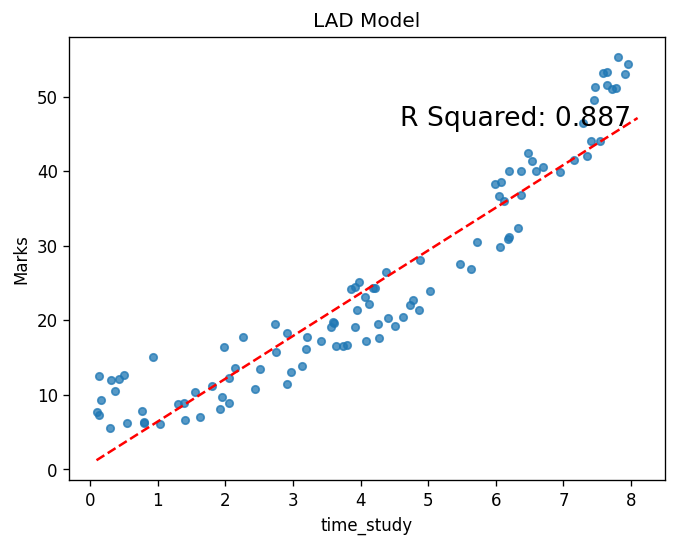

In [61]:
# 8 points
# YOUR CODE HERE:

# Same as before
y = student_data.Marks.values
time_study_avg = student_data.time_study_avg.values
N = time_study_avg.size
X = np.c_[np.ones(N), time_study_avg]
betas, R2 = linearModelFit(X, y, lossfcn=linearModelLossLAD)
print("Betas:", betas)
print("R2:", R2.round(3))

time_study_grid = np.arange(time_study_avg.min(), time_study_avg.max()+1)
Xn = np.c_[np.ones(time_study_grid.size), time_study_grid]
yn = linearModelPredict(betas, Xn)

fig, ax = plt.subplots(dpi = 120)
student_data.plot.scatter(x='time_study_avg', y='Marks', alpha=0.75, ax=ax)
ax.set_xlabel('time_study')
ax.set_ylabel('Marks')

ax.plot(time_study_grid, yn, color = 'red', linestyle = '--')
ax.annotate('R Squared: {R2}'.format(R2=R2.round(3)),
            xy=(0.75, 0.8),
            xycoords='axes fraction',
            ha='center',
            fontsize = 16)

ax.set_title('LAD Model')

plt.show()

**Written question**: What is the difference in the fit obtained with an L1 as compared to the L2 cost function? How their $R^2$ values compare? Why? [2 points]

<font color='yellow'> **Written Answer:**

A property of a LAD fit is that it gives less weight to the outliers compared to OLS fit. This dataset does not appear to have strong outliers. Therefore the R2 of LAD and OLS are very close. Because OLS minimizes the RSS, it is expected to show higher R2 than LAD.</font>

---
### Question 2.3: [12 points]

Fit an OLS model to all student data with the `linear_model` module from the `sklearn` package by using the [`LinearRegression`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) class. The features (i.e., predictors) to use are average study time, and number of courses.

In [54]:
# 8 points
# YOUR CODE HERE:

from sklearn import linear_model
X = student_data[['time_study_avg', 'number_courses']]
y = student_data.Marks.values

LR = linear_model.LinearRegression(fit_intercept=True, n_jobs=-1).fit(X, y)

print('OLS r-squared: ', LR.score(X,y).round(2))

# or
from sklearn.metrics import r2_score
print('OLS r-squared: ', r2_score(y, LR.predict(X)).round(2))

OLS r-squared:  0.94
OLS r-squared:  0.94


In [55]:
# Not part of the asking just FYI.

# Try OLS and LAD with both features:
y = student_data.Marks.values
time_study_avg = student_data.time_study_avg.values

N = time_study_avg.size
X = np.c_[np.ones(N), time_study_avg, student_data.number_courses]

betas, R2 = linearModelFit(X, y, lossfcn=linearModelLossRSS)
print(R2.round(2))

betas, R2 = linearModelFit(X, y, lossfcn=linearModelLossLAD)
print(R2.round(2))

0.94
0.93


In no more than two sentences, comment on the $R^2$ values from your `sklearn` model and previous models. Are they similar? [4 pts]

<font color='yellow'> **Written Answer:**

The $R^2$ is now 0.94, which is slightly larger than both the OLS and LAD (i.e., they had only one predictor). The addition of the second feature improved R2 a little bit and the original feature remains to be the main descriptor.</font>

---
## Part 3: Custom loss function

---
### Question 3.1: [4 points]

Assume that the following function has been proposed to you to use as a new loss function for regression:

$$L_3(\hat{\beta}) = \sum_{i=1}^{n} ({y_i-\hat{y_i}})^3$$

What do you think about this new loss function, would you accept it? Please, explain.


<font color='yellow'>**Written answer:**

I will not accept this form of loss function unless there is a justified use-case for it. Because this function will not take care of negative residuals.
</font>


---
### Question 3.2: [10 points]

Regardless of your answer to Question 4.1, taking $\: \hat{\mathbf{y}} = \mathbf{X.^2} \hat{\beta}\:$ as your functional form for regression (note that $\mathbf{X.^2}$ implies element-wise power), use your knowledge of calculus to calculate the gradient of $\: L_3(\hat{\beta}).$ Type your answer (including the intermediate steps) in the cell below in Latex format. Note that $\hat{\beta}=[\beta_0, \beta_1]^T$, and $\mathbf{X}$ is an $n$-by-$2$ matrix.

<font color='yellow'>**Written answer:**

$L_3(\hat{\beta}) = \sum_{i=1}^{n} ({y_i-\hat{y_i}})^3$, wherein $\hat{y_i}=\beta_0+\beta_1x^2_i$, therefore, $L_3(\hat{\beta}) = \sum (y_i-\beta_0-\beta_1x^2_i)^3.$

$\nabla L_3(\hat{\beta}) = [\partial L_3/\partial \beta_0, \partial L_3/\partial \beta_1]^T$, wherein,

$\partial L_3/\partial \beta_0 = \sum-3(y_i-\beta_0-\beta_1x^2_i)^2 =-3\sum (y_i-\hat{y_i})^2 = -3\sum r_i^2$, and

$\partial L_3/\partial \beta_1 = \sum-3x_i^2(y_i-\beta_0-\beta_1x_i^2)^2 = -3 \sum x_i^2(y_i-\hat{y_i})^2= -3\sum x_i^2r_i^2.$

$r_i$ represents the residuals, *i.e*, ${y_i-\hat{y_i}}$.

</font>
